# Exploring Prosper's Loan data
## by Amr Gamal Anwar

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [4]:
df['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [5]:
df.shape

(113937, 81)

### What is the structure of your dataset?

We have 11,3937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?

- BorrowerRate: The Borrower's interest rate for this loan.


- EstimatedReturn	The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.


- LoanOriginalAmount	The origination amount of the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- ListingNumber:	The number that uniquely identifies the listing to the public as displayed on the website.

- ListingCreationDate: The date the listing was created.

- CreditGrade: The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

- Term: The length of the loan expressed in months.

- LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

- ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.

- ListingCategory: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 
    Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

- Occupation: The Occupation selected by the Borrower at the time they created the listing.

- EmploymentStatusDuration: The length in months of the employment status at the time the listing was created.

- IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

- StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.

- IncomeRange:	The income range of the borrower at the time the listing was created.


In [6]:
df_new = df[['ListingNumber', 'CreditGrade',
       'Term', 'ListingCreationDate', 'LoanStatus', 'BorrowerRate',
       'EstimatedReturn', 'ProsperScore', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'StatedMonthlyIncome', 'IncomeRange', 'Occupation', 'ListingCategory (numeric)', 'LoanOriginalAmount']]
df_new.head()

,ListingNumber,CreditGrade,Term,ListingCreationDate,LoanStatus,BorrowerRate,EstimatedReturn,ProsperScore,EmploymentStatusDuration,IsBorrowerHomeowner,StatedMonthlyIncome,IncomeRange,Occupation,ListingCategory (numeric),LoanOriginalAmount
0,193129,C,36,2007-08-26 19:09:29.263000000,Completed,0.1580,NaN,NaN,2.0,True,3083.333333,"$25,000-49,999",Other,0,9425
1,1209647,NaN,36,2014-02-27 08:28:07.900000000,Current,0.0920,0.05470,7.0,44.0,False,6125.000000,"$50,000-74,999",Professional,2,10000
2,81716,HR,36,2007-01-05 15:00:47.090000000,Completed,0.2750,NaN,NaN,NaN,False,2083.333333,Not displayed,Other,0,3001
3,658116,NaN,36,2012-10-22 11:02:35.010000000,Current,0.0974,0.06000,9.0,113.0,True,2875.000000,"$25,000-49,999",Skilled Labor,16,10000
4,909464,NaN,36,2013-09-14 18:38:39.097000000,Current,0.2085,0.09066,4.0,44.0,True,9583.333333,"$100,000+",Executive,2,15000


In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   CreditGrade                28953 non-null   object 
 2   Term                       113937 non-null  int64  
 3   ListingCreationDate        113937 non-null  object 
 4   LoanStatus                 113937 non-null  object 
 5   BorrowerRate               113937 non-null  float64
 6   EstimatedReturn            84853 non-null   float64
 7   ProsperScore               84853 non-null   float64
 8   EmploymentStatusDuration   106312 non-null  float64
 9   IsBorrowerHomeowner        113937 non-null  bool   
 10  StatedMonthlyIncome        113937 non-null  float64
 11  IncomeRange                113937 non-null  object 
 12  Occupation                 110349 non-null  object 
 13  ListingCategory (numeric)  11

In [8]:
# Change types of ProsperScore and Term columns into category dtype
df_new['ProsperScore'] = df_new['ProsperScore'].astype('category')
df_new['Term'] = df_new['Term'].astype('category')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
#Check
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   ListingNumber              113937 non-null  int64   
 1   CreditGrade                28953 non-null   object  
 2   Term                       113937 non-null  category
 3   ListingCreationDate        113937 non-null  object  
 4   LoanStatus                 113937 non-null  object  
 5   BorrowerRate               113937 non-null  float64 
 6   EstimatedReturn            84853 non-null   float64 
 7   ProsperScore               84853 non-null   category
 8   EmploymentStatusDuration   106312 non-null  float64 
 9   IsBorrowerHomeowner        113937 non-null  bool    
 10  StatedMonthlyIncome        113937 non-null  float64 
 11  IncomeRange                113937 non-null  object  
 12  Occupation                 110349 non-null  object  
 13  ListingCategor

In [10]:
#Change ListingCategory column to string values
df_new['ListingCategory (numeric)'].replace({0: 'Not Available', 1:'Debt', 2:'Home Improvment', 3:'Business', 4:'Personal Loans', 5:'Student Use',
                6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagment Ring',
                12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle', 
                17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}, inplace=True)

#Change the dtype to category
df_new['ListingCategory (numeric)'] = df_new['ListingCategory (numeric)'].astype('category')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#Change Listing Category column name to fit the new format
df_new = df_new.rename(columns={'ListingCategory (numeric)': 'ListingCategory'})

#Check
df_new.columns

Index(['ListingNumber', 'CreditGrade', 'Term', 'ListingCreationDate',
       'LoanStatus', 'BorrowerRate', 'EstimatedReturn', 'ProsperScore',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'StatedMonthlyIncome', 'IncomeRange', 'Occupation', 'ListingCategory',
       'LoanOriginalAmount'],
      dtype='object')

In [12]:
#Change All object columns to category dtype
df_new['CreditGrade'] = df_new['CreditGrade'].astype('category')
df_new['LoanStatus'] = df_new['LoanStatus'].astype('category')
df_new['Occupation'] = df_new['Occupation'].astype('category')

In [13]:
#Change ListingCreationDate into datetime
df_new['ListingCreationDate'] = pd.to_datetime(df_new['ListingCreationDate'])

#Check
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingNumber             113937 non-null  int64         
 1   CreditGrade               28953 non-null   category      
 2   Term                      113937 non-null  category      
 3   ListingCreationDate       113937 non-null  datetime64[ns]
 4   LoanStatus                113937 non-null  category      
 5   BorrowerRate              113937 non-null  float64       
 6   EstimatedReturn           84853 non-null   float64       
 7   ProsperScore              84853 non-null   category      
 8   EmploymentStatusDuration  106312 non-null  float64       
 9   IsBorrowerHomeowner       113937 non-null  bool          
 10  StatedMonthlyIncome       113937 non-null  float64       
 11  IncomeRange               113937 non-null  object        
 12  Oc

## Univariate Exploration

<h3><center>Univariate Categorical Data</center></h3>

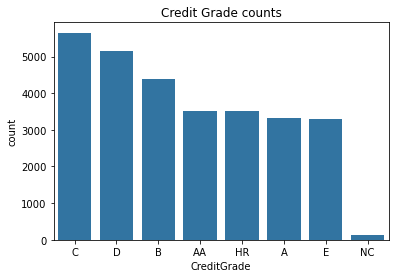

In [14]:
#Get base color variable and set it to blue
base_color = sb.color_palette()[0]

#Set frequency to order bars from largest to smallest
freq_grade = df_new['CreditGrade'].value_counts().index

# Draw a bar plot for the Credit Grade variable
sb.countplot(data = df_new, x='CreditGrade', color=base_color, order=freq_grade)
plt.title('Credit Grade counts');

<b>Observation:</b>
- We can see that the most common credit grades are C, D, and B. 
- The least common credit grade is NC.

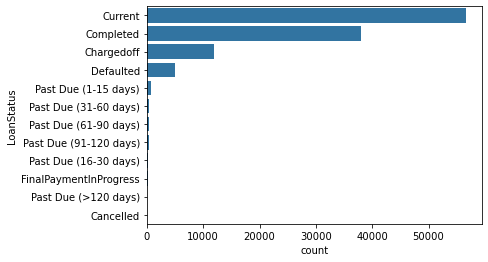

In [15]:
# Loan Status bar chart
freq_status = df_new['LoanStatus'].value_counts().index
sb.countplot(data=df_new, y='LoanStatus', color=base_color, order=freq_status);

In [16]:
#Check the number of records for the statuses that shows no bars
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

<b>Observation:</b> 
- The most common loan status is current then completed then charged off.
- Most other values like cancelled shows no record on the bar chart because their count is too small

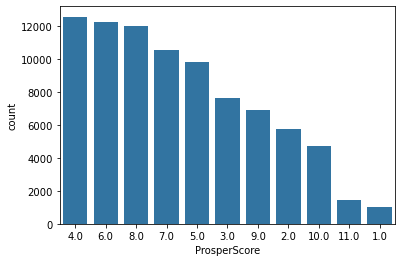

In [17]:
# ProsperScore bar chart, 1 being the highest risk and 10 being the lowest risk
freq_score = df_new['ProsperScore'].value_counts().index
sb.countplot(data=df_new, x='ProsperScore', color=base_color, order=freq_score);

<b>Observation:</b>
- We can notice that the most two common scores are 4 and 6, so slighlty below average risk and slightly above average risk, with average risk being 5.
- Then we can see that the least common are the extremes at 1, 10, and 2. With most counts for the in-between.
- There is a value for 11, which no information was given on under the data dictionary

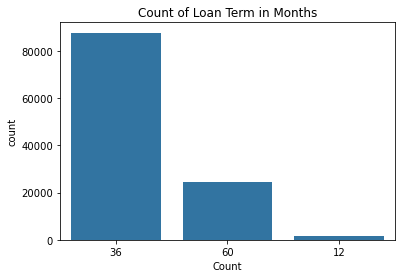

In [37]:
# Loan term (in months) bar chart
freq_term = df_new['Term'].value_counts().index
sb.countplot(data=df_new, x='Term', color=base_color, order=freq_term)
plt.title('Count of Loan Term in Months')
plt.xlabel('Count');

<b> Observation:</b>
- Obviously the 36 months term is the highest of the three, which means most loans apply for the medium length term.

In [19]:
# Check record values for the Occupation column
df_new['Occupation'].value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

<b>Observation:</b>
- Most applicants list their occupation as 'Other' or 'Professional', which don't give many details into what their job is.

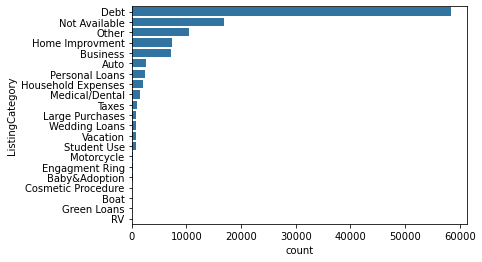

In [20]:
# Listing Category bar chart
freq_category = df_new['ListingCategory'].value_counts().index
sb.countplot(data=df_new, y='ListingCategory', color=base_color, order=freq_category);

<b>Observation:</b>
- The vast majority of loan applicants get a loan to pay off their debt.
- We could need more information about the Not Availabe and Other categories.

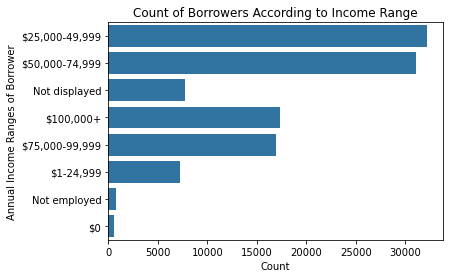

In [42]:
sb.countplot(data=df_new, y='IncomeRange', color=base_color)
plt.ylabel('Annual Income Ranges of Borrower')
plt.xlabel('Count')
plt.title('Count of Borrowers According to Income Range');

<b>Observation:</b>
- The most frequent income ranges are the 25,000-49,999 and the 50,000-74,999

<h3><center> Univariate Numeric Data </center></h3>

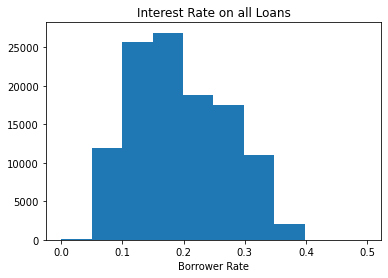

In [22]:
# Explore Borrower Rate distribution using histogram
plt.hist(df_new['BorrowerRate'])
plt.xlabel('Borrower Rate')
plt.title('Interest Rate on all Loans');

<b>Obsevation:</b>
- The distribution looks normal with the most counted points between 0.1 and 0.2

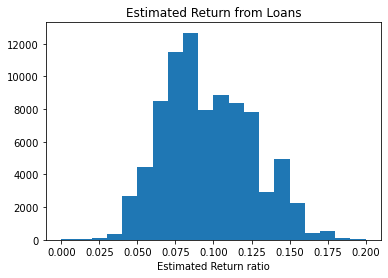

In [23]:
bins = np.arange(0, 0.21, 0.01)
plt.hist(df_new['EstimatedReturn'], bins=bins)
plt.xlabel('Estimated Return ratio')
plt.title('Estimated Return from Loans');

<b>Observation:</b>
- Normal distribution with the most counted points between 0.07 and 0.08

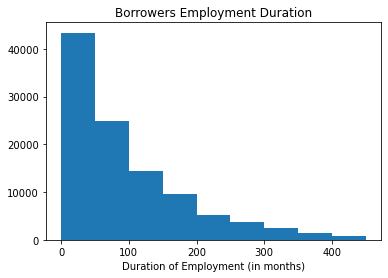

In [24]:
bins = np.arange(0, 500, 50)
plt.hist(df_new['EmploymentStatusDuration'], bins=bins)
plt.xlabel('Duration of Employment (in months)')
plt.title('Borrowers Employment Duration');

<b>Observation:</b>
- Distribution is highly skewed to the right, cumulating most points between 0 and 50 months
- We can notice the distribution takes the shape of a staircase, points cut off suddenly instead of a smooth decline.

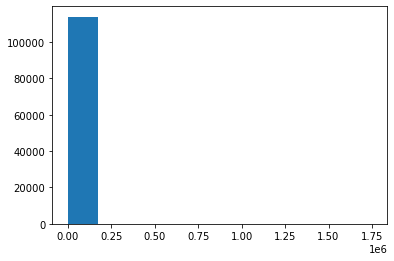

In [25]:
# Now Let's check the distribution of stated income
plt.hist(data=df_new, x='StatedMonthlyIncome');

This plot doesn't show clear values, and that is due to the abundance of values in this column. So let's trim it down to the most common values

In [26]:
#Check where the common values fall
df_new['StatedMonthlyIncome'].value_counts()

4166.666667    3526
5000.000000    3389
3333.333333    2917
3750.000000    2428
5416.666667    2374
               ... 
7101.000000       1
2701.083333       1
8183.833333       1
8477.666667       1
3843.500000       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

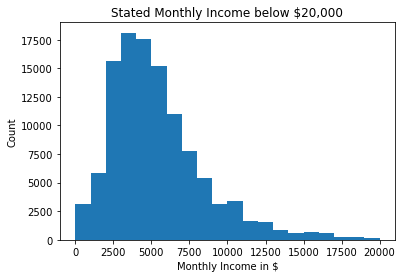

In [44]:
#Make a new dataframe with the values above 20,000 filtered out
df_copy = df_new[df_new['StatedMonthlyIncome'] <= 20000]

#Then use it to make the bins
bins = np.arange(0, df_copy['StatedMonthlyIncome'].max()+1000,1000 ) 
plt.hist(data = df_new, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Monthly Income in $')
plt.title('Stated Monthly Income below $20,000')
plt.ylabel('Count');

<b>Observation:</b>
- When plotting values below \$20,000, the distribution appears skewed to the right.
- Most values are between 2,500 and 7,500 dollars a month.

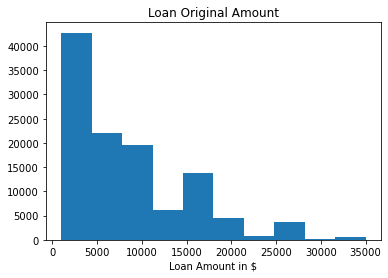

In [28]:
# Plotting Loan Original Amount column
plt.hist(df_new['LoanOriginalAmount'])
plt.xlabel('Loan Amount in $')
plt.title('Loan Original Amount');

<b>Observation:</b>
- We can notice that points are mostly between 0 and 5000 dollars, with less counts arround higher amounts.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There are many features with values that are too rare occuring. Like the NC in CreditGrade. Also features that have a few dominant values like Term and ListingCategory

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The StatedIncome variable was a good indicator after narrowing it down to incomes below \$\20,000, I saw that it is slighltly skewed to the right with most values between 2500 and 7500 dollars a month.

## Bivariate Exploration

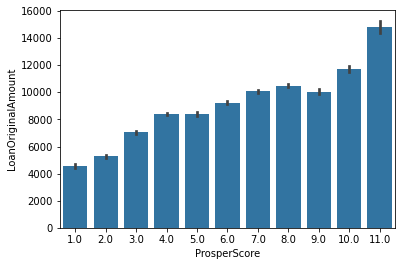

In [29]:
sb.barplot(data=df_new, x='ProsperScore', y='LoanOriginalAmount', color=base_color);

<b>Observation:</b> 
- The higher the risk of the loan, the higher the amount given out for. 

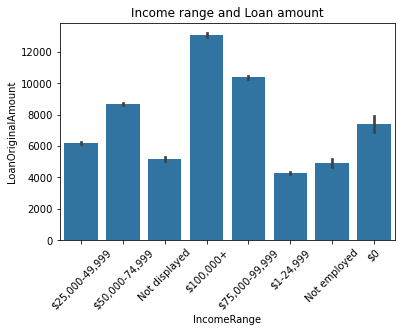

In [30]:
sb.barplot(data=df_new, x='IncomeRange', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=45)
plt.title('Income range and Loan amount');

<b>Observation:</b>
- Higher income ranges are given more loan amounts

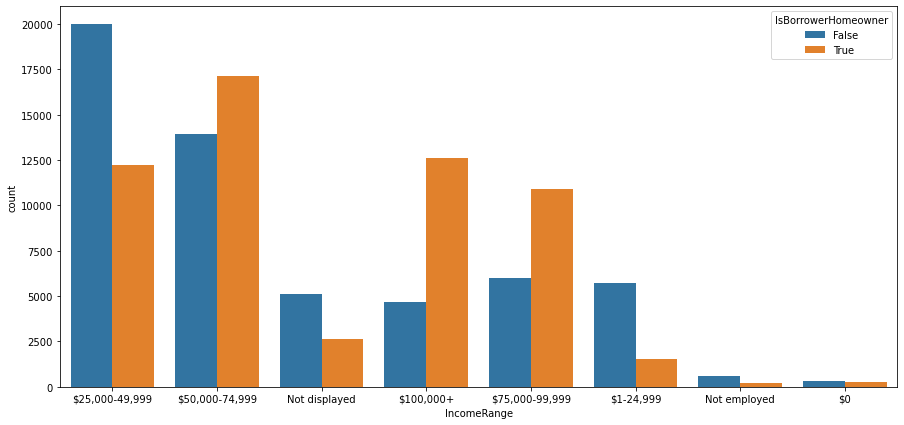

In [31]:
plt.figure(figsize=[15,7])
sb.countplot(data=df_new, x='IncomeRange', hue='IsBorrowerHomeowner');

<b>Observation:</b>
- It's apparent that the higher the income range for a person is, the more likely they will also own a home.
- The highest count of loan applicants is for the mid-income level individuals who do not own a home.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, the homeownership obviusly is more true with higher income ranges than lower income ranges.

## Multivariate Exploration

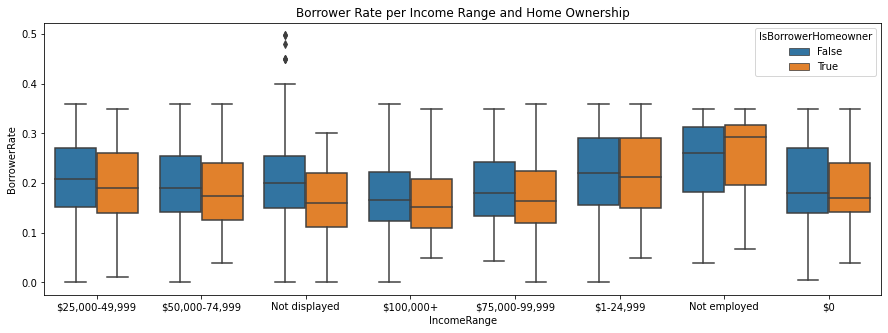

In [32]:
plt.figure(figsize=[15,5])
sb.boxplot(data = df_new, x = 'IncomeRange', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner')
plt.title('Borrower Rate per Income Range and Home Ownership');

<b>Observation:</b>
- It appears that the 'Not displayed' income range who does not own a home, stretches over the interest rates with even multiple outliers. Which means 

In [74]:
df_new['IncomeRange'].astype(str).drop(['Not displayed', 'Not employed'])

KeyError: "['Not displayed' 'Not employed'] not found in axis"

In [70]:
df_new['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [63]:
df_new['IncomeRange'].drop(index = ['Not displayed', 'Not employed'])

KeyError: "['Not displayed' 'Not employed'] not found in axis"

In [59]:
df_new['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

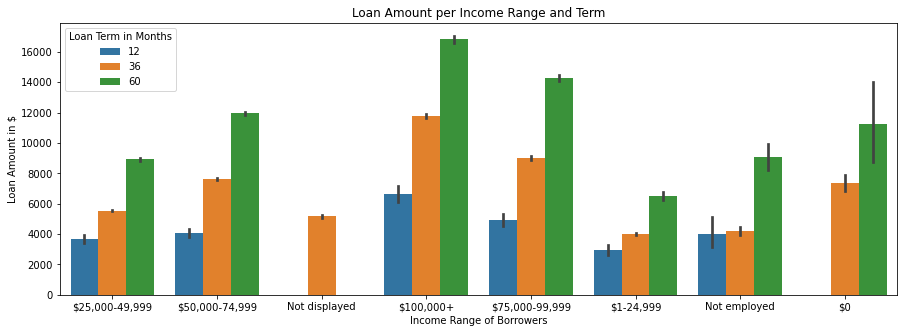

In [48]:
plt.figure(figsize=[15,5])
sb.barplot(data = df_new, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'Term')
plt.title('Loan Amount per Income Range and Term')
plt.xlabel('Income Range of Borrowers')
plt.legend(title = 'Loan Term in Months')
plt.ylabel('Loan Amount in $')
plt.savefig('test3.png');

<b>Observation:</b>
- Generally, the longer the term of the loan the higher its amount and vice versa.
- High income ranges tends to get a bigger loan amount than lower income ranges.

### Were there any interesting or surprising interactions between features?

The longer the term of the loan, the higher its amount and vice versa.
High income ranges tends to get a bigger loan amount than lower income ranges.